In [ ]:
# mengimport library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Time Series Forcasting NO2**

In [ ]:
ready_data = pd.read_csv('https://raw.githubusercontent.com/erlanherlangga1/health-checks/main/ready_data.csv',delimiter=',')
ready_data = ready_data.drop(columns='Unnamed: 0')
ready_data

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-01,60.0,4.0,73.0,27.00,14.0,73.0,CO,SEDANG
1,2010-01-02,41.0,7.0,30.0,17.00,13.0,41.0,PM10,BAIK
2,2010-01-03,60.0,5.0,39.0,44.00,19.0,60.0,PM10,SEDANG
3,2010-01-04,59.0,5.0,46.0,72.75,21.0,59.0,PM10,SEDANG
4,2010-01-05,60.0,15.5,24.0,28.00,10.0,60.0,PM10,SEDANG
...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,52.0,61.0,15.0,20.00,15.0,71.0,PM25,SEDANG
4379,2021-12-28,51.0,53.0,15.0,18.00,13.0,65.0,PM25,SEDANG
4380,2021-12-29,31.0,54.0,10.0,24.00,11.0,54.0,SO2,SEDANG
4381,2021-12-30,55.0,53.0,16.0,23.00,14.0,71.0,PM25,SEDANG


In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   pm10      4383 non-null   float64
 2   so2       4383 non-null   float64
 3   co        4383 non-null   float64
 4   o3        4383 non-null   float64
 5   no2       4383 non-null   float64
 6   max       4383 non-null   float64
 7   critical  4383 non-null   object 
 8   categori  4383 non-null   object 
dtypes: float64(6), object(3)
memory usage: 308.3+ KB


In [ ]:
ready_data['tanggal']=pd.to_datetime(ready_data['tanggal'])

In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4383 non-null   datetime64[ns]
 1   pm10      4383 non-null   float64       
 2   so2       4383 non-null   float64       
 3   co        4383 non-null   float64       
 4   o3        4383 non-null   float64       
 5   no2       4383 non-null   float64       
 6   max       4383 non-null   float64       
 7   critical  4383 non-null   object        
 8   categori  4383 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 308.3+ KB


In [ ]:
# Set kolom 'Date' sebagai indeks
ready_data.set_index('tanggal', inplace=True)
ready_data


,pm10,so2,co,o3,no2,max,critical,categori
tanggal,,,,,,,,
2010-01-01,60.0,4.0,73.0,27.00,14.0,73.0,CO,SEDANG
2010-01-02,41.0,7.0,30.0,17.00,13.0,41.0,PM10,BAIK
2010-01-03,60.0,5.0,39.0,44.00,19.0,60.0,PM10,SEDANG
2010-01-04,59.0,5.0,46.0,72.75,21.0,59.0,PM10,SEDANG
2010-01-05,60.0,15.5,24.0,28.00,10.0,60.0,PM10,SEDANG
...,...,...,...,...,...,...,...,...
2021-12-27,52.0,61.0,15.0,20.00,15.0,71.0,PM25,SEDANG
2021-12-28,51.0,53.0,15.0,18.00,13.0,65.0,PM25,SEDANG
2021-12-29,31.0,54.0,10.0,24.00,11.0,54.0,SO2,SEDANG


In [ ]:
data_timeseries = ready_data.drop(columns=['max','critical','categori'])
data_timeseries

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-01,60.0,4.0,73.0,27.00,14.0
2010-01-02,41.0,7.0,30.0,17.00,13.0
2010-01-03,60.0,5.0,39.0,44.00,19.0
2010-01-04,59.0,5.0,46.0,72.75,21.0
2010-01-05,60.0,15.5,24.0,28.00,10.0
...,...,...,...,...,...
2021-12-27,52.0,61.0,15.0,20.00,15.0
2021-12-28,51.0,53.0,15.0,18.00,13.0
2021-12-29,31.0,54.0,10.0,24.00,11.0


In [ ]:
# Resampling data harian menjadi mingguan
weekly_data = data_timeseries.resample('W-Mon').mean()

In [ ]:
weekly_data

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-04,55.000000,5.250000,47.000000,40.187500,16.750000
2010-01-11,51.571429,16.357143,26.714286,43.785714,16.714286
2010-01-18,37.857143,6.571429,30.142857,19.142857,14.000000
2010-01-25,48.285714,4.142857,41.714286,20.571429,15.571429
2010-02-01,47.285714,6.285714,33.142857,25.142857,14.142857
...,...,...,...,...,...
2021-12-06,44.857143,24.571429,13.714286,19.142857,21.428571
2021-12-13,46.428571,31.000000,9.857143,19.000000,16.571429
2021-12-20,53.428571,40.857143,18.142857,23.142857,13.000000


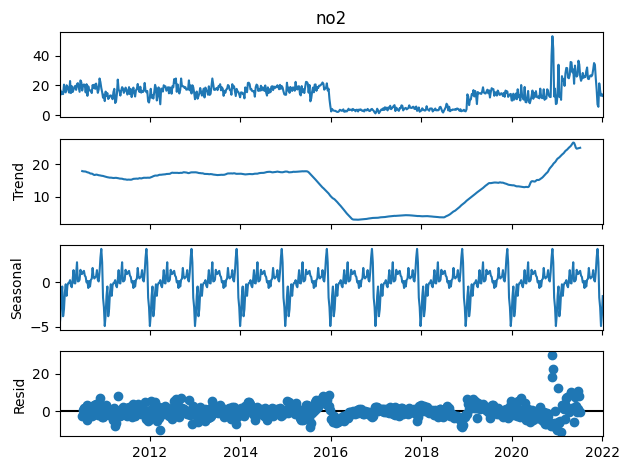

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = weekly_data['no2']
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# split data training dan testing
train=weekly_data.iloc[:round(len(weekly_data)*0.8)]
test=weekly_data.iloc[round(len(weekly_data)*0.8):]

In [ ]:
train

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-04,55.000000,5.250000,47.000000,40.187500,16.750000
2010-01-11,51.571429,16.357143,26.714286,43.785714,16.714286
2010-01-18,37.857143,6.571429,30.142857,19.142857,14.000000
2010-01-25,48.285714,4.142857,41.714286,20.571429,15.571429
2010-02-01,47.285714,6.285714,33.142857,25.142857,14.142857
...,...,...,...,...,...
2019-07-15,56.371429,23.238095,18.904762,66.428571,15.619048
2019-07-22,60.714286,21.571429,23.428571,58.714286,18.142857
2019-07-29,63.857143,19.285714,21.142857,54.285714,17.571429


In [ ]:
test

,pm10,so2,co,o3,no2
tanggal,,,,,
2019-08-19,61.500000,17.714286,20.285714,64.142857,15.285714
2019-08-26,56.428571,19.142857,21.000000,60.000000,15.285714
2019-09-02,59.571429,17.000000,22.571429,86.714286,13.142857
2019-09-09,51.714286,14.285714,22.857143,71.000000,16.571429
2019-09-16,57.314286,21.714286,18.142857,72.714286,15.285714
...,...,...,...,...,...
2021-12-06,44.857143,24.571429,13.714286,19.142857,21.428571
2021-12-13,46.428571,31.000000,9.857143,19.000000,16.571429
2021-12-20,53.428571,40.857143,18.142857,23.142857,13.000000


In [ ]:
print(train.shape)
print(test.shape)

(502, 5)
(125, 5)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax=SARIMAX(train['co'],
                      order=(1,0,0),
                      seasonal_order=(2, 1, 0, 52))

#training/melatih model sarimax
result_sarimax=model_sarimax.fit()

result_sarimax.save('sarimax_model.pkl')



In [ ]:
#membuat prediksi dgn model
forecast_step = 125  # jumlah langkah kedepan yg ingin di prediksi
predictions = result_sarimax.get_forecast(steps=forecast_step)

#mendapatkan hasil prediksi
forecast_values=predictions.predicted_mean
confidence_intervals=predictions.conf_int()

#menampilkan hasail prediksi
print(forecast_values)
print(confidence_intervals)

2019-08-19    16.271325
2019-08-26    19.218447
2019-09-02    22.078341
2019-09-09    21.057337
2019-09-16    20.039288
                ...    
2021-12-06    18.200233
2021-12-13    17.637513
2021-12-20    14.390387
2021-12-27    12.001267
2022-01-03    22.917999
Freq: W-MON, Name: predicted_mean, Length: 125, dtype: float64
            lower co   upper co
2019-08-19  4.954282  27.588368
2019-08-26  6.250044  32.186850
2019-09-02  8.634488  35.522193
2019-09-09  7.468028  34.646647
2019-09-16  6.404750  33.673825
...              ...        ...
2021-12-06  1.600606  34.799859
2021-12-13  1.037887  34.237140
2021-12-20 -2.209240  30.990014
2021-12-27 -4.598360  28.600893
2022-01-03  6.318372  39.517626

[125 rows x 2 columns]


In [ ]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                 co   No. Observations:                  502
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 52)   Log Likelihood               -1436.203
Date:                            Wed, 13 Dec 2023   AIC                           2880.406
Time:                                    14:52:07   BIC                           2896.843
Sample:                                01-04-2010   HQIC                          2886.884
                                     - 08-12-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5596      0.034     16.295      0.000       0.492       0.627
ar.S.L52      -0.5394      0.046    -11.841      0.000      -0.629      -0.450
ar.S.L104     -0.2362      0.043     -5.451      0.000      -0.321      -0.151
sigma2        33.3403      1.880     17.735      0.000      29.656      37.025
===================================================================================
Ljung-Box (L1) (Q):                  16.83   Jarque-Bera (JB):                38.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predicted_val = pd.DataFrame(forecast_values)
predicted_val

,predicted_mean
2019-08-19,16.271325
2019-08-26,19.218447
2019-09-02,22.078341
2019-09-09,21.057337
2019-09-16,20.039288
...,...
2021-12-06,18.200233
2021-12-13,17.637513
2021-12-20,14.390387
2021-12-27,12.001267


In [ ]:
predicted_val.describe()

,predicted_mean
count,125.000000
mean,20.697439
std,2.722054
min,12.001267
25%,19.218447
50%,21.015768
75%,22.283567
max,28.008243


In [ ]:
tess = weekly_data.iloc[round(len(weekly_data)*0.8):]
tess

,pm10,so2,co,o3,no2
tanggal,,,,,
2019-08-19,61.500000,17.714286,20.285714,64.142857,15.285714
2019-08-26,56.428571,19.142857,21.000000,60.000000,15.285714
2019-09-02,59.571429,17.000000,22.571429,86.714286,13.142857
2019-09-09,51.714286,14.285714,22.857143,71.000000,16.571429
2019-09-16,57.314286,21.714286,18.142857,72.714286,15.285714
...,...,...,...,...,...
2021-12-06,44.857143,24.571429,13.714286,19.142857,21.428571
2021-12-13,46.428571,31.000000,9.857143,19.000000,16.571429
2021-12-20,53.428571,40.857143,18.142857,23.142857,13.000000


In [ ]:
predicted_val1 = pd.concat([tess['no2'], predicted_val],axis=1)
predicted_val1

,no2,predicted_mean
2019-08-19,15.285714,16.271325
2019-08-26,15.285714,19.218447
2019-09-02,13.142857,22.078341
2019-09-09,16.571429,21.057337
2019-09-16,15.285714,20.039288
...,...,...
2021-12-06,21.428571,18.200233
2021-12-13,16.571429,17.637513
2021-12-20,13.000000,14.390387
2021-12-27,14.142857,12.001267


In [ ]:
from google.colab import files
predicted_val1.to_csv('actual_vs_predicted_no2.csv', encoding = 'utf-8-sig',index=False)
files.download('actual_vs_predicted_no2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='tanggal'>

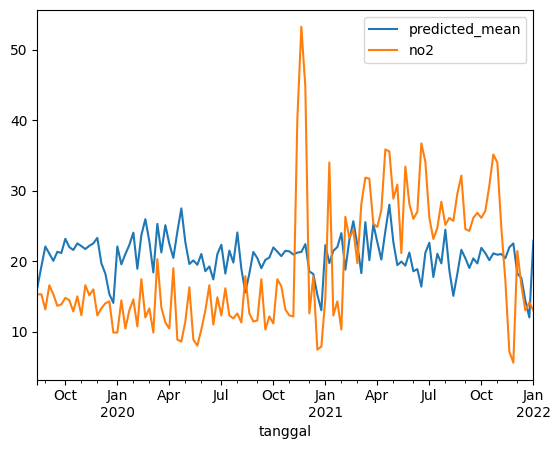

In [ ]:
import matplotlib.pyplot as plt


#plot prediksi vs actual
predicted_val1['predicted_mean'].plot(legend=True)
tess['no2'].plot(legend=True)

## **Evaluasi Seasonal ARIMA**

In [ ]:
# Load tools evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

In [ ]:
# Menggunakan fungsi rmse
rmse_value = rmse(test['no2'], predicted_val1['predicted_mean'])

# Menampilkan hasil RMSE
print("RMSE:", rmse_value)

RMSE: 9.317280310112869
